In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the data

__Idea__

- Books: DataFrame with information about books, i.e. ISBN, a numeric identifier for books, and the title.
- Users: DataFrame with information about users, such as User-ID, Location and Age
- Ratings: DataFrame with the ratings each user gave to each book. Ratings can be implciit (0) or explicit (1 - 10).

In [4]:
books = pd.read_csv('./data/Books.csv')
books.head()

/tmp/ipykernel_8768/3710192629.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('./data/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users = pd.read_csv('./data/Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [29]:
ratings = pd.read_csv('./data/Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [30]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [9]:
books.columns = ['ISBN',
                 'bookTitle',
                 'bookAuthor',
                 'yearOfPublication',
                 'publisher',
                 'imageUrlS',
                 'imageUrlM',
                 'imageUrlL']

In [10]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis=1, inplace=True)

#checking data types of columns
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [11]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [12]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953','bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','bookTitle'] = ("DK Readers: Creating the X-Men,"
                                                     "How Comic Books Come to Life (Level 4: Proficient Readers)")

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = ("DK Readers: Creating the X-Men,"
                                                     "How It All Began (Level 4: Proficient Readers)")

#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men,How It All Bega...",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men,How Comic Books...",James Buckley,2000,DK Publishing Inc


In [13]:
books.yearOfPublication.values.astype(float)

ValueError: could not convert string to float: 'Gallimard'

In [14]:
books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [15]:
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = "Jean-Marie Gustave Le Clézio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le Clézio,2003,Gallimard


In [16]:
np.unique(books.yearOfPublication.values.astype(float))

array([   0., 1376., 1378., 1806., 1897., 1900., 1901., 1902., 1904.,
       1906., 1908., 1909., 1910., 1911., 1914., 1917., 1919., 1920.,
       1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929.,
       1930., 1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938.,
       1939., 1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947.,
       1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956.,
       1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965.,
       1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974.,
       1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983.,
       1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992.,
       1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2008., 2010., 2011., 2012.,
       2020., 2021., 2024., 2026., 2030., 2037., 2038., 2050.])

In [17]:
# Convert year of publication into numeric type
books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')

# Sets invalid years as NAN
books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0), 'yearOfPublication'] = np.NAN

<AxesSubplot: ylabel='Density'>

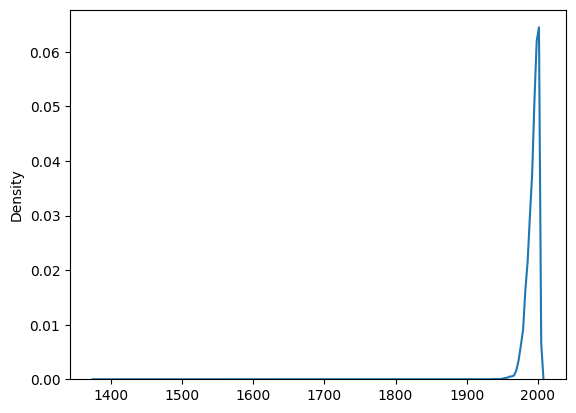

In [18]:
sns.kdeplot(books.loc[books.yearOfPublication.values.astype(float) > 0.0].yearOfPublication.values.astype(float))

## Analyzing the Ratings DataFrame

The rating dataframe has 3 columns,

- User-ID contains an unique identifier for the user.
- ISBN contains an unique identifier for the book.

In [31]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


We start by filtering out implicit ratings, as they are inconsistent with explicit ratings. This comes from the fact that, if someone rates a book as 0, it does not necessarily mean a bad review.

In [32]:
ratings = ratings[ratings['Book-Rating'] > 0]
ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Note that ratings are skewed towards good ratings. This phenomenon makes sense, since users that did not like books may not be motivated to rate books.

In [36]:
u, c = np.unique(ratings['Book-Rating'].values, return_counts=True)

<BarContainer object of 10 artists>

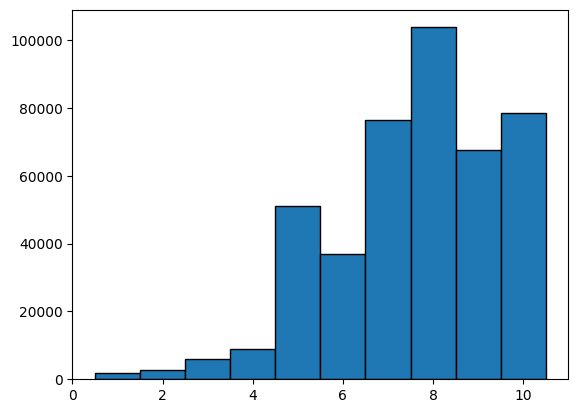

In [37]:
plt.bar(u, c, width=1, edgecolor='k')

## Ratings by ISBN or Book Title?

Note that a slight challenge comes from the fact that a single book has potentially multiple ISBNs, as can be seen here,

In [77]:
books[books['bookTitle'] == 'Rising Sun']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
1860,0345380371,Rising Sun,MICHAEL CRICHTON,1992.0,Ballantine Books
6621,0394589424,Rising Sun,Michael Crichton,1992.0,Alfred A. Knopf
239971,0679410996,Rising Sun,Michael Crichton,1992.0,Random House Trade


As a result, it is better to do calculations by book title, and not ISBN.

In [78]:
ratings_with_book_titles = pd.merge(ratings, books, how='inner', on='ISBN')

In [79]:
ratings_with_book_titles

,User-ID,ISBN,Book-Rating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001.0,Doubleday
...,...,...,...,...,...,...,...
383837,276688,0425156737,2,Graven Images,Jane Waterhouse,1997.0,Berkley Publishing Group
383838,276688,0671563149,6,MUDDY WATER (Peter Bartholomew Mysteries),Sally Gunning,1997.0,Pocket
383839,276688,1575660792,7,Gray Matter,Shirley Kennett,1996.0,Kensington Publishing Corporation
383840,276704,0380796155,5,White Abacus,Damien Broderick,1998.0,Eos


## Pivot Matrix

We're now interested in creating a pivot matrix out of the ratings dataframe. This matrix is defined as,

$$
R_{ij} = \begin{cases}
r(u_{i}, b_{j}) & \text{ if user } u_{i} \text{ rated book } b_{j}\\
+\infty & \text{ otherwise}
\end{cases}
$$

where, for $+\infty$ we mean an invalid value. Naturally, $\mathbf{R} \in \mathbb{R}^{n \times m}$, where $n$ is the number of unique users, and $m$ is the number of unique books. We can calculate those beforehand, so as to estimate how much memory $\mathbf{R}$ will occupy in memory,

In [81]:
n = len(np.unique(ratings_with_book_titles['User-ID']))
m = len(np.unique(ratings_with_book_titles['bookTitle']))

In [82]:
n, m

(68091, 135567)

If we encode each entry in $\mathbf{R}$ with a data type ```np.float32```, we get the following amount of bits,

In [83]:
print(32 * n * m)

295388563104


which, in gigabytes, corresponds to,

In [84]:
print((32 * n * m) * 1.25e-10)

36.923570388


This is much more than the average RAM memory of commercial computers. As a result, we need to reduce the memory footprint of the pivot matrix. Here's 4 directions,

1. Reducing the number of users. This can be done, for instance, by discarting users that did not rate many books. These users will likely not contribute to new recommendations.
2. Reducing the number of books. This makes the recommendation system poorer, but one may imagine that users will likely not ask for recommendations of rare books.
3. Reducing the encoding of elements $R_{ij}$. Since reviews range from $\{+\infty, 1, 2, 3, \cdots, 10\}$, one only needs, in theory, 4 bits of information for each entry.
4. Using sparse data types. Most likely, most users will rate a small portion of books. As a result, many entries in $R_{ij}$ will have $+\infty$ (or another specific value). See for instance [Scipy sparse matrices](https://docs.scipy.org/doc/scipy/reference/sparse.html).

In this project you will play with points 1, 2 and 3. Note that points 1 and 2 reduce the complexity of the recommendation system, so you can reason about it as a kind of regularization principle.

To start, we may filter users that did not rate many books. First, let us look at the distribution of ratings per user,

In [87]:
unique_users, frequency_users = np.unique(ratings_with_book_titles['User-ID'], return_counts=True)

Text(0.5, 0, 'Number of Ratings')

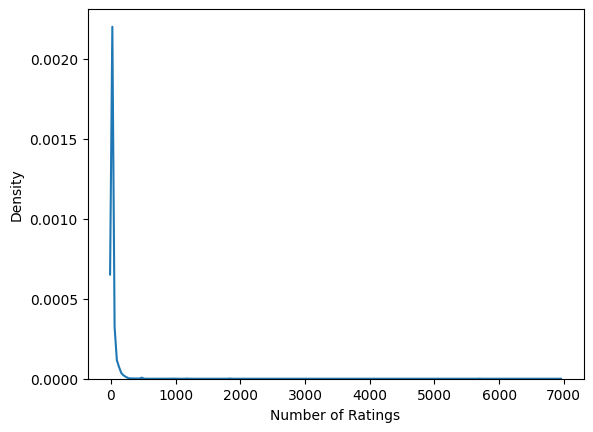

In [88]:
ax = sns.kdeplot(frequency_users)
ax.set_xlabel('Number of Ratings')

As is clear from the density, most users rated 0 or a few books. As a result we sort and filter out irrelevant users,

In [89]:
ind_sorted = frequency_users.argsort()[::-1]

In [90]:
print(frequency_users[ind_sorted])

[6943 5691 1899 ...    1    1    1]


In [91]:
np.quantile(frequency_users, 0.99)

74.10000000000582

In [92]:
len(np.where(frequency_users > 1)[0])

28868

In [93]:
unique_users = unique_users[np.where(frequency_users > 1)[0]]
frequency_users = frequency_users[np.where(frequency_users > 1)[0]]

Now, we may repeat the same process for the books.

In [101]:
unique_title, frequency_title = np.unique(ratings_with_book_titles['bookTitle'], return_counts=True)

Text(0.5, 24.0, 'Number of Ratings')

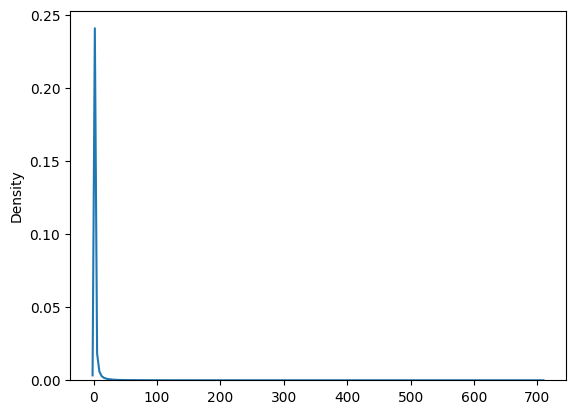

In [102]:
sns.kdeplot(frequency_title)
ax.set_xlabel('Number of Ratings')

In [96]:
n_books = 5000

In [103]:
ind_sorted = frequency_title.argsort()[::-1]

unique_title = unique_title[ind_sorted[:n_books]]
frequency_title = frequency_title[ind_sorted[:n_books]]

with our compressed encoding of $\mathbf{R}$, we are able to fit the pivot matrix into memory,

In [104]:
len(unique_users), len(unique_title)

(28868, 5000)

In [105]:
print((8 * len(unique_users) * len(unique_title)) * 1e-9)

1.15472


In [106]:
ratings_with_book_titles[ratings_with_book_titles['bookTitle'] == 'Rising Sun']

,User-ID,ISBN,Book-Rating,bookTitle,bookAuthor,yearOfPublication,publisher
79649,4107,0345380371,5,Rising Sun,MICHAEL CRICHTON,1992.0,Ballantine Books
79650,7283,0345380371,8,Rising Sun,MICHAEL CRICHTON,1992.0,Ballantine Books
79651,7346,0345380371,9,Rising Sun,MICHAEL CRICHTON,1992.0,Ballantine Books
79652,7620,0345380371,9,Rising Sun,MICHAEL CRICHTON,1992.0,Ballantine Books
79653,12698,0345380371,7,Rising Sun,MICHAEL CRICHTON,1992.0,Ballantine Books
...,...,...,...,...,...,...,...
89718,5963,0394589424,6,Rising Sun,Michael Crichton,1992.0,Alfred A. Knopf
89719,37623,0394589424,7,Rising Sun,Michael Crichton,1992.0,Alfred A. Knopf
89720,172203,0394589424,8,Rising Sun,Michael Crichton,1992.0,Alfred A. Knopf
89721,186527,0394589424,7,Rising Sun,Michael Crichton,1992.0,Alfred A. Knopf


In [110]:
unique_id_to_index = {
    uid: i for i, uid in enumerate(unique_users)
}

unique_title_to_index = {
    u_title: j for j, u_title in enumerate(unique_title)
}

In [111]:
unique_id_to_index

{8: 0,
 14: 1,
 17: 2,
 26: 3,
 39: 4,
 53: 5,
 56: 6,
 87: 7,
 92: 8,
 99: 9,
 114: 10,
 165: 11,
 183: 12,
 228: 13,
 232: 14,
 242: 15,
 243: 16,
 244: 17,
 254: 18,
 256: 19,
 257: 20,
 272: 21,
 289: 22,
 300: 23,
 361: 24,
 376: 25,
 383: 26,
 387: 27,
 388: 28,
 392: 29,
 393: 30,
 408: 31,
 413: 32,
 424: 33,
 433: 34,
 440: 35,
 441: 36,
 444: 37,
 446: 38,
 460: 39,
 472: 40,
 476: 41,
 486: 42,
 487: 43,
 496: 44,
 500: 45,
 503: 46,
 505: 47,
 507: 48,
 508: 49,
 566: 50,
 567: 51,
 595: 52,
 596: 53,
 619: 54,
 620: 55,
 625: 56,
 626: 57,
 628: 58,
 638: 59,
 640: 60,
 643: 61,
 651: 62,
 657: 63,
 685: 64,
 695: 65,
 707: 66,
 709: 67,
 712: 68,
 714: 69,
 726: 70,
 735: 71,
 741: 72,
 744: 73,
 746: 74,
 753: 75,
 758: 76,
 763: 77,
 776: 78,
 777: 79,
 786: 80,
 805: 81,
 819: 82,
 827: 83,
 834: 84,
 843: 85,
 850: 86,
 853: 87,
 882: 88,
 885: 89,
 896: 90,
 899: 91,
 900: 92,
 901: 93,
 914: 94,
 929: 95,
 984: 96,
 1009: 97,
 1021: 98,
 1022: 99,
 1024: 100,
 1025:

In [112]:
unique_title_to_index

{'The Lovely Bones: A Novel': 0,
 'Wild Animus': 1,
 'The Da Vinci Code': 2,
 'The Secret Life of Bees': 3,
 'The Nanny Diaries: A Novel': 4,
 'The Red Tent (Bestselling Backlist)': 5,
 "Bridget Jones's Diary": 6,
 'A Painted House': 7,
 'Life of Pi': 8,
 'Harry Potter and the Chamber of Secrets (Book 2)': 9,
 'Divine Secrets of the Ya-Ya Sisterhood: A Novel': 10,
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))": 11,
 'Angels &amp; Demons': 12,
 'The Summons': 13,
 "Where the Heart Is (Oprah's Book Club (Paperback))": 14,
 'The Notebook': 15,
 'Girl with a Pearl Earring': 16,
 'Harry Potter and the Prisoner of Azkaban (Book 3)': 17,
 'Snow Falling on Cedars': 18,
 "The Pilot's Wife : A Novel": 19,
 'To Kill a Mockingbird': 20,
 'The Catcher in the Rye': 21,
 'Timeline': 22,
 'The Testament': 23,
 "The Girls' Guide to Hunting and Fishing": 24,
 'Summer Sisters': 25,
 "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson": 26,
 'Good in Bed': 27,
 

In [113]:
r = [unique_id_to_index[user]
     for user, title in zip(ratings_with_book_titles['User-ID'],
                            ratings_with_book_titles['bookTitle']) if (user in unique_id_to_index and
                                                                       title in unique_title_to_index)]

In [114]:
c = [unique_isbn_to_index[title]
     for user, title in zip(ratings_with_book_titles['User-ID'],
                            ratings_with_book_titles['bookTitle']) if (user in unique_id_to_index and
                                                                       title in unique_title_to_index)]

In [115]:
v = [rating
     for user, title, rating in zip(ratings_with_book_titles['User-ID'],
                                    ratings_with_book_titles['bookTitle'],
                                    ratings_with_book_titles['Book-Rating'])
         if (user in unique_id_to_index and
             title in unique_title_to_index)]

In [116]:
R = np.zeros([len(unique_users), n_books], dtype=np.int8)
R[r, c] = v

In [117]:
R

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

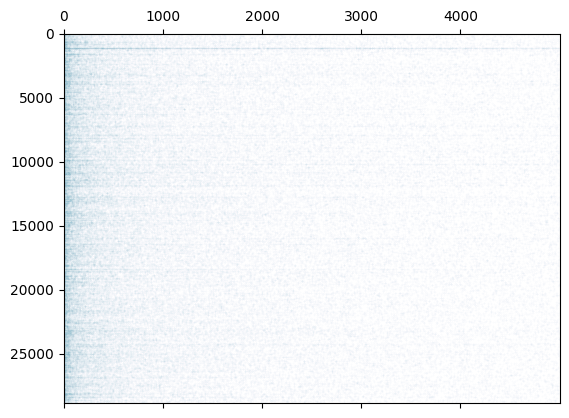

In [126]:
plt.spy(R, aspect='auto', markersize=0.005)

In [147]:
unique_title_to_index['The Lovely Bones: A Novel']

0

In [149]:
x = R[:, 0]

In [150]:
def my_correlation(x, y):
    inds = np.where((x != 0) & (y != 0))[0]
    
    if len(inds) > 1:
        return np.corrcoef(x[inds], y[inds])[0, 1]
    else:
        return -1

In [151]:
c = []
for j in range(n_books):
    corr = my_correlation(x, R[:, j])
    if np.isnan(corr):
        c.append(np.nan)
    else:
        c.append(corr)
c = np.array(c)

In [152]:
ind_not_nan = np.where(~np.isnan(c))[0]
ind_sorted = c[ind_not_nan].argsort()[::-1]
ind_sorted = ind_not_nan[ind_sorted]

In [153]:
c[ind_sorted[1:]]

array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [154]:
[unique_title[i] for i in ind_sorted[1:11]]

['Reunion',
 'Brazen Virtue',
 'A Home at the End of the World: A Novel',
 'The Crush',
 'Julie and Romeo',
 'E-Wally and the Quest',
 'Catfantastic',
 'Generation X: Tales for an Accelerated Culture',
 'Cold Case',
 'I Thee Wed']

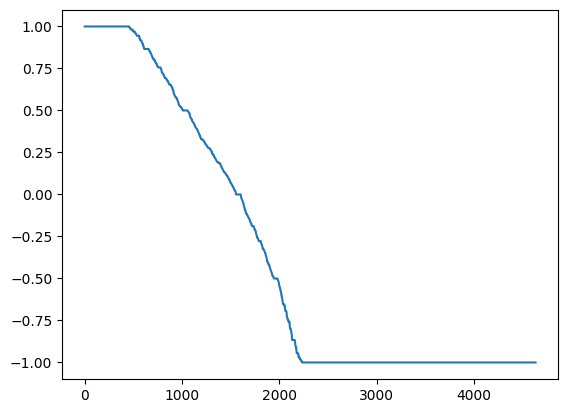

In [155]:
plt.plot(c[ind_sorted])

## What's next?

From this initial code, you should create the class that is specified in the project description. Furthermore, for the author recommendation part, you should use [Pandas' groubpy method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html), grouping the ```ratings_with_book_titles``` dataframe by User-ID and Author name. __Do not forget to turn your code into a proper class as specified in the project description__.